# Front Matter

# Executive Summary

# Reproducible Analysis

# Analysis on Opportunities & Risks Arising from Covid-19 

Question(s) that will inspire data analytics:
1. What are the most popular listings in London ?
2. What are the patterns and trends across 2020 ?
3. What are the upsides and downsides of the COvid-19 pandemic to AirBnB bunisess operation ?

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
sns.set()


In [2]:
#All the Paths in used to load data.
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv')

### DATA UNDERSTANDING


In [3]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,105,2,192,2020-03-26,1.46,2,338
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,2,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,231
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77136 entries, 0 to 77135
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              77136 non-null  int64  
 1   name                            77112 non-null  object 
 2   host_id                         77136 non-null  int64  
 3   host_name                       77095 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   77136 non-null  object 
 6   latitude                        77136 non-null  float64
 7   longitude                       77136 non-null  float64
 8   room_type                       77136 non-null  object 
 9   price                           77136 non-null  int64  
 10  minimum_nights                  77136 non-null  int64  
 11  number_of_reviews               77136 non-null  int64  
 12  last_review                     

In [5]:
reviews.head()

,listing_id,date
0,11551,2010-03-21
1,11551,2010-03-29
2,11551,2010-05-09
3,11551,2010-06-01
4,11551,2010-06-28


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178933 entries, 0 to 1178932
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1178933 non-null  int64 
 1   date        1178933 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.0+ MB


In [7]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6874942,2020-12-30,t,$100.00,$100.00,2.0,1125.0
1,6874942,2020-12-31,f,$100.00,$100.00,2.0,1125.0
2,6874942,2021-01-01,t,$100.00,$100.00,2.0,1125.0
3,6874942,2021-01-02,t,$100.00,$100.00,2.0,1125.0
4,6874942,2021-01-03,t,$100.00,$100.00,2.0,1125.0


In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582714 entries, 0 to 582713
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      582714 non-null  int64  
 1   date            582714 non-null  object 
 2   available       582714 non-null  object 
 3   price           582714 non-null  object 
 4   adjusted_price  582714 non-null  object 
 5   minimum_nights  582540 non-null  float64
 6   maximum_nights  582540 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 31.1+ MB


In [9]:
# extract years, month and days
calendar['year'] = pd.DatetimeIndex(calendar.date).year
calendar['month'] = pd.DatetimeIndex(calendar.date).month
calendar['day'] = pd.DatetimeIndex(calendar.date).day

# transform price columns to floats
calendar['price'] = calendar.price.replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar.adjusted_price.replace('[\$,]', '', regex=True).astype(float)

calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582714 entries, 0 to 582713
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      582714 non-null  int64         
 1   date            582714 non-null  datetime64[ns]
 2   available       582714 non-null  object        
 3   price           582714 non-null  float64       
 4   adjusted_price  582714 non-null  float64       
 5   minimum_nights  582540 non-null  float64       
 6   maximum_nights  582540 non-null  float64       
 7   year            582714 non-null  int64         
 8   month           582714 non-null  int64         
 9   day             582714 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 44.5+ MB




## MOST POPULAR LISITINGS IN LONDON

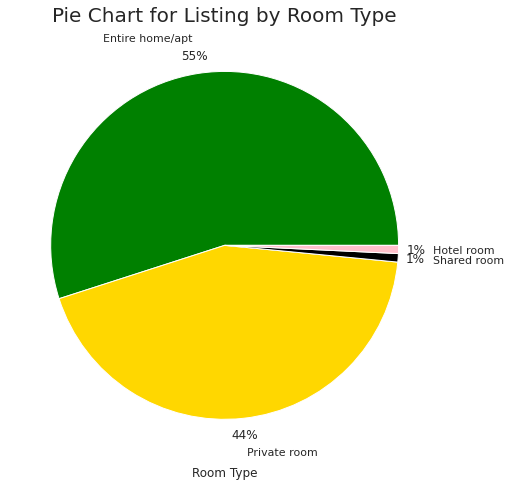

In [10]:

listings['room_type'].value_counts().plot(kind = 'pie', colors=['green', 'gold', 'black', 'pink'], figsize = (8, 8), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Pie Chart for Listing by Room Type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('')
plt.show()

## NEIGHBORHOOD WITH MOST LISTING

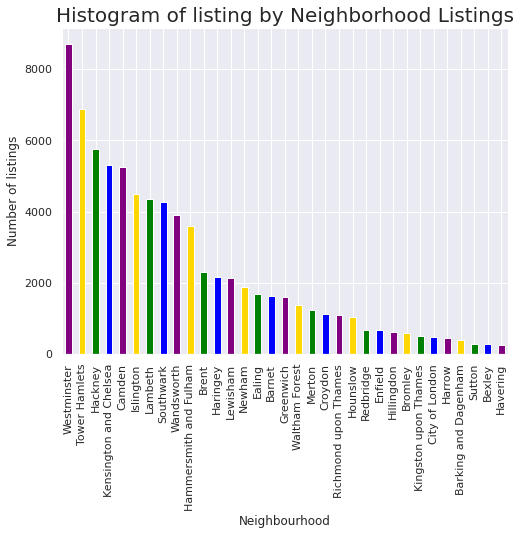

In [11]:
listings['neighbourhood'].value_counts().plot(kind = 'bar', color = ['purple','gold', 'green','blue'], figsize = (8, 6))
plt.title('Histogram of listing by Neighborhood Listings', fontsize = 20)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.show()


In [12]:
print("List of the Most common type of room in every neighbourhood: \n")
neighbourhoods = listings['neighbourhood'].value_counts().keys().tolist()
for neighbourhood in neighbourhoods:
    print("{}: {} - entries: {}".format(neighbourhood, 
                                    np.argmax(listings.loc[listings['neighbourhood'] == neighbourhood]['room_type'].value_counts()),
                                    np.max(listings.loc[listings['neighbourhood'] == neighbourhood]['room_type'].value_counts())))

List of the Most common type of room in every neighbourhood: 

Westminster: 0 - entries: 6354
Tower Hamlets: 0 - entries: 3527
Hackney: 0 - entries: 3131
Kensington and Chelsea: 0 - entries: 4088
Camden: 0 - entries: 3412
Islington: 0 - entries: 2746
Lambeth: 0 - entries: 2234
Southwark: 0 - entries: 2277
Wandsworth: 0 - entries: 2195
Hammersmith and Fulham: 0 - entries: 2254
Brent: 0 - entries: 1165
Haringey: 0 - entries: 1189
Lewisham: 0 - entries: 1206
Newham: 0 - entries: 1158
Ealing: 0 - entries: 1021
Barnet: 0 - entries: 911
Greenwich: 0 - entries: 855
Waltham Forest: 0 - entries: 732
Merton: 0 - entries: 668
Croydon: 0 - entries: 705
Richmond upon Thames: 0 - entries: 619
Hounslow: 0 - entries: 569
Redbridge: 0 - entries: 462
Enfield: 0 - entries: 430
Hillingdon: 0 - entries: 408
Bromley: 0 - entries: 349
Kingston upon Thames: 0 - entries: 281
City of London: 0 - entries: 418
Harrow: 0 - entries: 300
Barking and Dagenham: 0 - entries: 277
Sutton: 0 - entries: 197
Bexley: 0 - ent

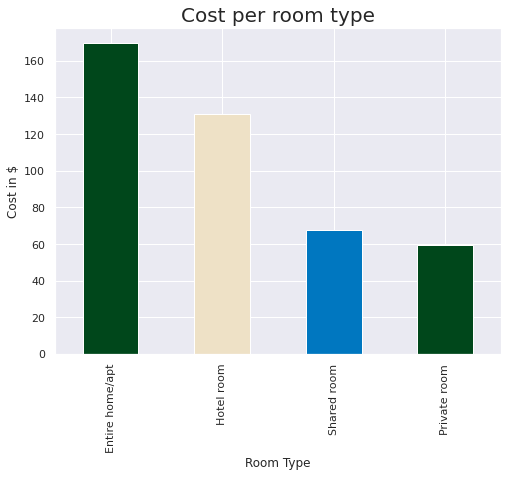

In [13]:
room_types = listings.groupby('room_type')
# FInd out the mean value of the prices in each room type
prices = room_types['price'].mean().sort_values(ascending = False)
prices.plot(kind = 'bar', color=['#00471b', '#eee1c6', '#0077c0'] ,figsize = (8, 6))
plt.title('Cost per room type', fontsize = 20)
plt.xlabel('Room Type')
plt.ylabel('Cost in $')
plt.show()

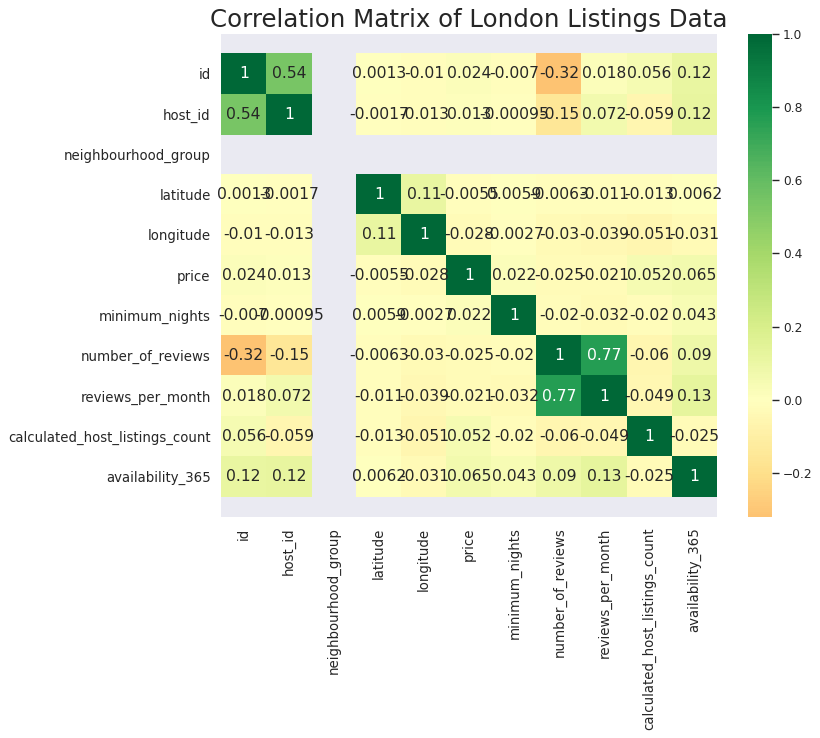

In [14]:

# Plot histogram
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(listings.corr(), xticklabels=listings.corr().columns, yticklabels=listings.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={'size':14})

# Decorations
plt.title('Correlation Matrix of London Listings Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

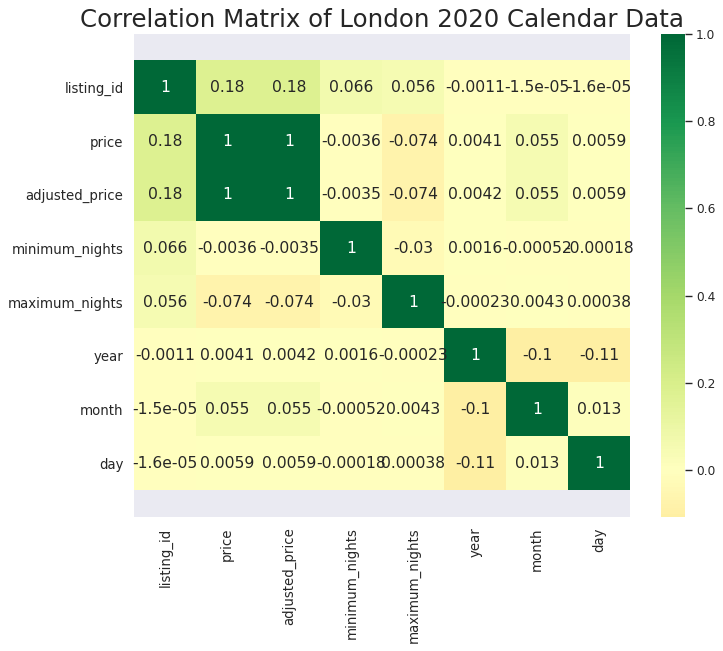

In [15]:
# Plot histogram
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(calendar.corr(), xticklabels=calendar.corr().columns, yticklabels=calendar.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={'size':14})

# Decorations
plt.title('Correlation Matrix of London 2020 Calendar Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [16]:
N=12
ind = np.arange(N) 
grouped_price20 = calendar.groupby(['month'])['price'].mean()
grouped_price20 = [i for i in grouped_price20]

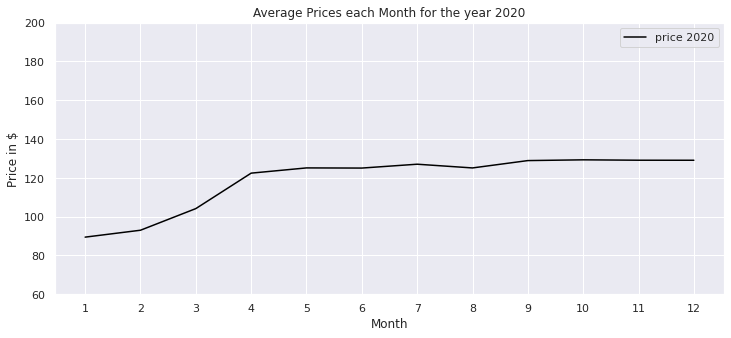

In [17]:

plt.figure(figsize=(12,5))
plt.plot(grouped_price20, color='black', label='price 2020')
plt.ylabel('Price in $')
plt.xlabel('Month')
plt.title('Average Prices each Month for the year 2020')
plt.ylim([60,200])
plt.legend(loc='best')
plt.xticks(ind, np.arange(1, 13, 1))
plt.show()